Name: Rohini Kokare
MIS No: 812203003

1. Understand and implement the different initialization methods given below - 
Zeros, Random, Xavier, He

2. Understand and implement the different activation functions given below - 
(sigmoid, tanh, relu, leaky-relu)

3. Perform experiments using various combinations of initialization methods and
activation functions and analyze the error rate, accuracy and convergence time. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
sns.set()

In [3]:
# Activation Function : Sigmoid Function

#function for sigmoid neuron
def sigmoid(x, w, b):
    return 1/(1 + np.exp(-(w*x + b)))

#input data
values = np.arange(-10, 10, 0.1)
w = 1.0
b = 1.0

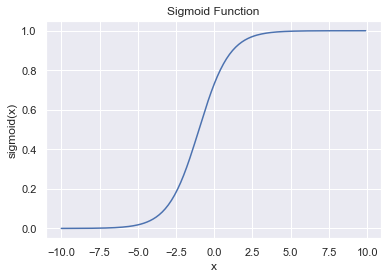

In [4]:
#plot for 1-D sigmoid neuron
plt.plot(values, sigmoid(values,w,b))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()

In [5]:
#Tanh Function

#function for tanh neuron
def tanh(x, w, b):
    return (2.0/(1.0 + np.exp(-2*x))) - 1

#input data
values = np.arange(-10, 10, 0.1)
w = 1.0
b = 1.0

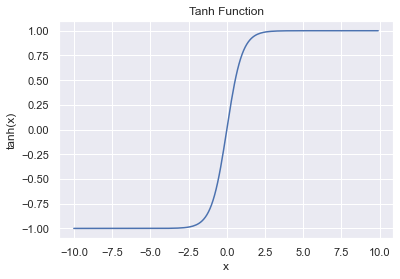

In [6]:
#plot for 1-D tanh neuron
plt.plot(values, tanh(values,w,b))
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('Tanh Function')
plt.show()

In [7]:
#Relu Function

#function for relu neuron
def relu(x, w, b):
    result=[]
    for item in x:
        result.append(max(0.0, item))
    return result

#input data
values = np.arange(-10, 10, 0.1)
w = 1.0
b = 1.0

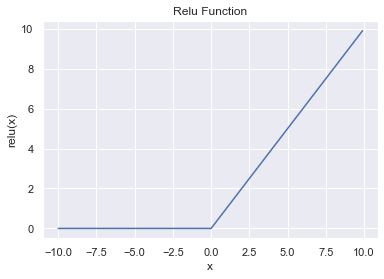

In [8]:
#plot for 1-D relu neuron
plt.plot(values, relu(values,w,b))
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.title('Relu Function')
plt.show()

In [9]:
#Generate Data

data, labels = make_blobs(n_samples=500, centers=2, n_features=2, random_state=12)
print(data.shape, labels.shape)

(500, 2) (500,)


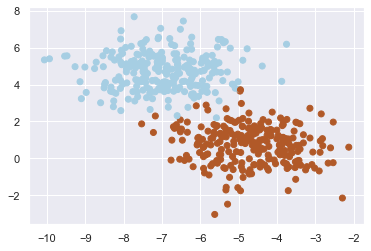

In [10]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap='Paired')

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=100)

In [13]:
# Neural Network Class

#Here considered SimpleNetworkA3

class neuralNetwork:
    def __init__(self):
        #initialize weight to random values and bias to zero
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    
    def tanh(self, x):
        return (2.0/(1.0 + np.exp(-2*x))) - 1
    
    def relu(self, x):
        return max(0.0, x)
    
    def forward_pass_sigmoid(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3
    
    def forward_pass_tanh(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.tanh(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.tanh(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.tanh(self.a3)
        return self.h3
    
    def forward_pass_relu(self, x):
        self.x1, self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.h1 = self.relu(self.a1)
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        self.h2 = self.relu(self.a2)
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.relu(self.a3)
        #print(self.h1, self.w1, self.a1)
        #print(self.h2, self.w2, self.a2)
        #print(self.h3, self.w3, self.a3)
        #print('-----')
        return self.h3
    
    def grad(self, x, y, af='sigmoid'):
        if af=='sigmoid':
            self.forward_pass_sigmoid(x)
        if af=='tanh':
            self.forward_pass_tanh(x)
        if af=='relu':
            self.forward_pass_relu(x)
        self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
        self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
        self.db3 = (self.h3-y) * self.h3*(1-self.h3)
        self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
        self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
        self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
        self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
        self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
        self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
        #print('--y=', y)
        
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False, activation_function='sigmoid'):
        if initialise=='zeros':
            self.w1 = 0
            self.w2 = 0
            self.w3 = 0
            self.w4 = 0
            self.w5 = 0
            self.w6 = 0
        if initialise=='xavier':
            n=1
            lower, upper = -(1.0 / np.sqrt(n)), (1.0 / np.sqrt(n))
            self.w1 = lower + np.random.randn() * (upper-lower)
            self.w2 = lower + np.random.randn() * (upper-lower)
            self.w3 = lower + np.random.randn() * (upper-lower)
            self.w4 = lower + np.random.randn() * (upper-lower)
            n=2
            lower, upper = -(1.0 / np.sqrt(n)), (1.0 / np.sqrt(n))
            self.w5 = lower + np.random.randn() * (upper-lower)
            self.w6 = lower + np.random.randn() * (upper-lower)
        if initialise=='he':
            n=1
            std = np.sqrt(2.0/n)
            self.w1 = np.random.randn() * std
            self.w2 = np.random.randn() * std
            self.w3 = np.random.randn() * std
            self.w4 = np.random.randn() * std
            n=2
            std = np.sqrt(2.0/n)
            self.w5 = np.random.randn() * std
            self.w6 = np.random.randn() * std
        if display_loss:
            loss = {}
        for i in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
            for x, y in zip(X, Y):
                self.grad(x, y,activation_function)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
            m = X.shape[1]
            self.w1 -= learning_rate * dw1 / m
            self.w2 -= learning_rate * dw2 / m
            self.w3 -= learning_rate * dw3 / m
            self.w4 -= learning_rate * dw4 / m
            self.w5 -= learning_rate * dw5 / m
            self.w6 -= learning_rate * dw6 / m
            self.b1 -= learning_rate * db1 / m
            self.b2 -= learning_rate * db2 / m
            self.b3 -= learning_rate * db3 / m
            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
    def predict(self, X, activation_function='sigmoid'):
        Y_pred = []
        for x in X:
            if activation_function=='sigmoid':
                y_pred = self.forward_pass_sigmoid(x)
            if activation_function=='tanh':
                y_pred = self.forward_pass_tanh(x)
            if activation_function=='relu':
                y_pred = self.forward_pass_relu(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

100%|██████████| 500/500 [00:25<00:00, 19.79epoch/s]


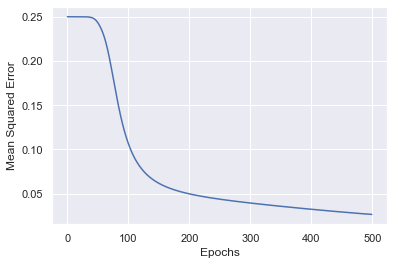

In [14]:
#Fit Model and View Results
#Initialization Function: Zeros, Activation Function: Sigmoid

nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='sigmoid', initialise='zeros')

In [15]:
Y_pred_train = nn.predict(X_train, activation_function='sigmoid')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='sigmoid')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.97
Validation accuracy 0.98


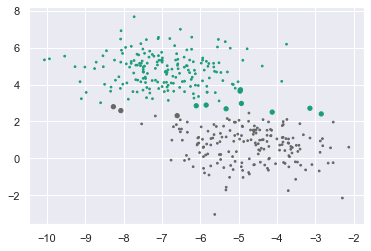

In [16]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

100%|██████████| 500/500 [00:25<00:00, 19.61epoch/s]


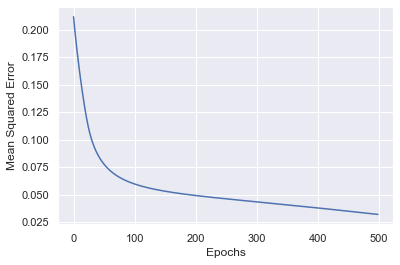

In [17]:
#Initialization Function: Random, Activation Function: Sigmoid

nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='sigmoid')

In [18]:
Y_pred_train = nn.predict(X_train, activation_function='sigmoid')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='sigmoid')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.96
Validation accuracy 0.98


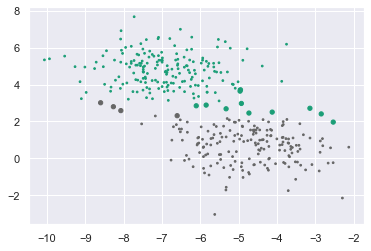

In [19]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

100%|██████████| 500/500 [00:24<00:00, 20.28epoch/s]


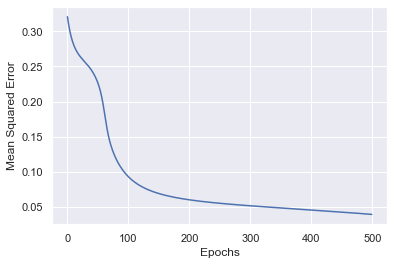

In [20]:
#Initialization Function: Xavier, Activation Function: Sigmoid

nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='sigmoid', initialise='xavier')

In [21]:
Y_pred_train = nn.predict(X_train, activation_function='sigmoid')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='sigmoid')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.95
Validation accuracy 0.95


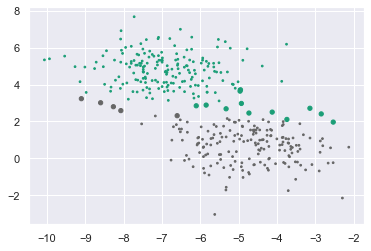

In [22]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

100%|██████████| 500/500 [00:23<00:00, 20.97epoch/s]


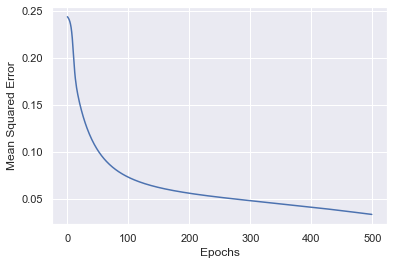

In [23]:
#Initialization Function: He, Activation Function: Sigmoid

nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='sigmoid', initialise='he')


In [24]:
Y_pred_train = nn.predict(X_train, activation_function='sigmoid')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='sigmoid')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.96
Validation accuracy 0.97


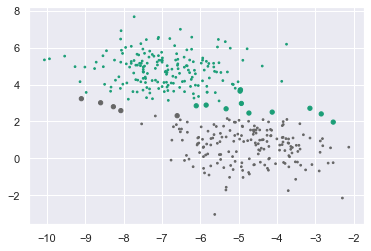

In [25]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

100%|██████████| 500/500 [00:22<00:00, 22.61epoch/s]


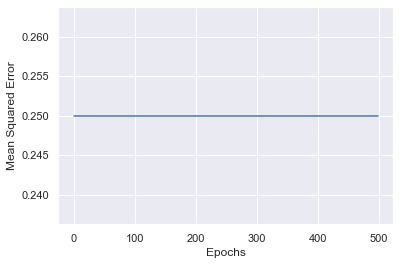

In [26]:
#Initialization Function: Zeros, Activation Function: Tanh

nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='tanh', initialise='zeros')


In [27]:
Y_pred_train = nn.predict(X_train, activation_function='tanh')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='tanh')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


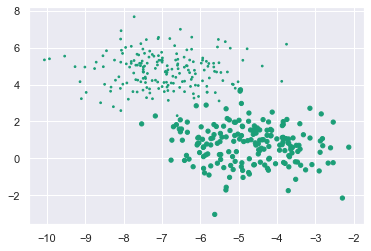

In [28]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

 19%|█▉        | 94/500 [00:04<00:18, 21.46epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
 19%|█▉        | 97/500 [00:04<00:19, 20.91epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
 20%|██        | 100/500 [00:04<00:19, 20.89epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipyth

 28%|██▊       | 138/500 [00:08<00:46,  7.82epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 28%|██▊       | 140/500 [00:08<00:38,  9.30epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


 34%|███▍      | 170/500 [00:11<00:27, 12.22epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 34%|███▍      | 172/500 [00:11<00:26, 12.49epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 41%|████      | 203/500 [00:14<00:23, 12.43epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 41%|████      | 205/500 [00:14<00:25, 11.74epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return

<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 47%|████▋     | 234/500 [00:16<00:28,  9.33epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 47%|████▋     | 236/500 [00:17<00:27,  9.52epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return

 53%|█████▎    | 263/500 [00:20<00:32,  7.27epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 53%|█████▎    | 264/500 [00:20<00:33,  7.02epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 53%|█████▎    | 265/500 [00:21<00:32,  7.24epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 53%|█████▎    | 266/500 [00:21<00:31,  7.44epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1

 58%|█████▊    | 292/500 [00:24<00:33,  6.22epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 59%|█████▊    | 293/500 [00:25<00:37,  5.49epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 59%|█████▉    | 294/500 [00:25<00:39,  5.27epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 59%|█████▉    | 295/500 [00:25<00:40,  5.08epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1

 64%|██████▍   | 321/500 [00:30<00:41,  4.30epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 64%|██████▍   | 322/500 [00:30<00:37,  4.69epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 65%|██████▍   | 323/500 [00:30<00:34,  5.20epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 65%|██████▍   | 324/500 [00:31<00:32,  5.33epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1

 70%|███████   | 350/500 [00:35<00:19,  7.61epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 70%|███████   | 351/500 [00:35<00:20,  7.29epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 70%|███████   | 352/500 [00:35<00:21,  7.02epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 71%|███████   | 353/500 [00:35<00:21,  6.99epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1

<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 76%|███████▌  | 380/500 [00:39<00:16,  7.09epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 76%|███████▌  | 381/500 [00:39<00:16,  7.42epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 76%|███████▋  | 382/500 [00:39<00:14,  7.96epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: 

 82%|████████▏ | 412/500 [00:42<00:09,  9.49epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 83%|████████▎ | 414/500 [00:42<00:08, 10.17epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


 89%|████████▊ | 443/500 [00:45<00:04, 11.75epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 89%|████████▉ | 445/500 [00:45<00:04, 13.18epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


 95%|█████████▌| 475/500 [00:48<00:01, 13.99epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 95%|█████████▌| 477/500 [00:48<00:01, 14.62epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


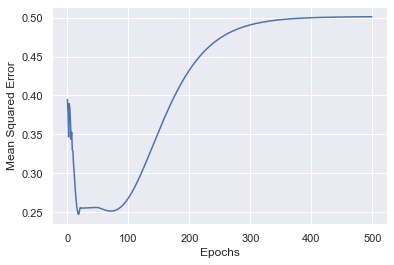

In [29]:
#Initialization Function: Random, Activation Function: Tanh

nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='tanh')


In [30]:
Y_pred_train = nn.predict(X_train, activation_function='tanh')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='tanh')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.41
Validation accuracy 0.38


<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1


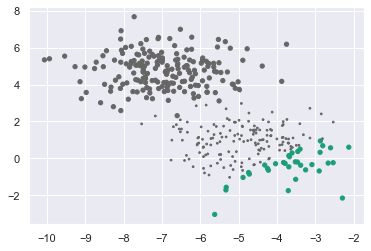

In [31]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

  0%|          | 2/500 [00:00<00:33, 14.71epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
  4%|▍         | 22/500 [00:00<00:20, 22.97epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
  5%|▌         | 25/500 [00:01<00:21, 22.25epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-1

<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 13%|█▎        | 64/500 [00:03<00:26, 16.22epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 13%|█▎        | 66/500 [00:03<00:26, 16.35epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  

 19%|█▉        | 95/500 [00:05<00:26, 15.06epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 19%|█▉        | 97/500 [00:05<00:25, 16.08epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  

 25%|██▌       | 127/500 [00:07<00:23, 15.96epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 26%|██▌       | 129/500 [00:07<00:22, 16.16epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


 32%|███▏      | 159/500 [00:09<00:23, 14.62epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 32%|███▏      | 161/500 [00:09<00:22, 15.18epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


 38%|███▊      | 191/500 [00:11<00:23, 12.96epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 39%|███▊      | 193/500 [00:11<00:23, 12.82epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


 45%|████▍     | 223/500 [00:14<00:25, 10.88epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 45%|████▌     | 225/500 [00:14<00:27,  9.85epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


 51%|█████     | 255/500 [00:16<00:15, 16.18epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 51%|█████▏    | 257/500 [00:16<00:14, 16.65epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


 57%|█████▋    | 287/500 [00:18<00:13, 15.34epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 58%|█████▊    | 289/500 [00:18<00:13, 15.14epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


 64%|██████▍   | 319/500 [00:21<00:14, 12.44epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 64%|██████▍   | 321/500 [00:21<00:14, 12.64epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


 70%|███████   | 352/500 [00:24<00:12, 11.99epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 71%|███████   | 354/500 [00:24<00:11, 12.70epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 77%|███████▋  | 385/500 [00:27<00:12,  9.02epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 77%|███████▋  | 387/500 [00:27<00:12,  8.98epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 83%|████████▎ | 416/500 [00:30<00:07, 10.64epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 84%|████████▎ | 418/500 [00:30<00:07, 11.47epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


 89%|████████▉ | 447/500 [00:33<00:03, 16.71epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 90%|████████▉ | 449/500 [00:33<00:03, 16.87epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


 96%|█████████▌| 479/500 [00:35<00:01, 11.95epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 96%|█████████▌| 481/500 [00:35<00:01, 10.31epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


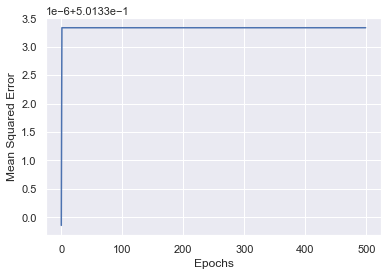

In [32]:
#Initialization Function: Xavier, Activation Function: Tanh

nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='tanh', initialise='xavier')


In [33]:
Y_pred_train = nn.predict(X_train, activation_function='tanh')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='tanh')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1


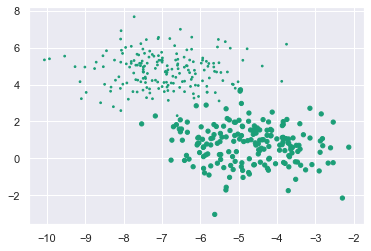

In [34]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

  7%|▋         | 36/500 [00:02<00:28, 16.33epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
  8%|▊         | 38/500 [00:02<00:27, 17.02epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
  8%|▊         | 40/500 [00:02<00:26, 17.40epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
  8%|▊         | 42/500 [00:02<00:27, 16.54epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in 

<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 16%|█▌        | 81/500 [00:05<00:25, 16.16epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 17%|█▋        | 83/500 [00:05<00:26, 15.75epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (

<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 23%|██▎       | 113/500 [00:06<00:24, 15.90epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 23%|██▎       | 115/500 [00:07<00:23, 16.12epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return

<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 29%|██▉       | 145/500 [00:08<00:21, 16.41epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 29%|██▉       | 147/500 [00:09<00:22, 15.86epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return

<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 35%|███▌      | 177/500 [00:10<00:20, 15.97epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 36%|███▌      | 179/500 [00:10<00:19, 16.49epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return

<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 42%|████▏     | 209/500 [00:12<00:19, 15.31epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 42%|████▏     | 211/500 [00:12<00:17, 16.31epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return

<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 48%|████▊     | 241/500 [00:14<00:19, 13.44epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 49%|████▊     | 243/500 [00:15<00:18, 14.03epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return

 55%|█████▍    | 273/500 [00:17<00:17, 12.87epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 55%|█████▌    | 275/500 [00:17<00:17, 12.76epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


 61%|██████    | 305/500 [00:19<00:14, 13.60epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 61%|██████▏   | 307/500 [00:20<00:13, 13.91epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 67%|██████▋   | 337/500 [00:22<00:18,  8.73epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 68%|██████▊   | 338/500 [00:22<00:18,  8.64epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 68%|██████▊   | 339/500 [00:22<00:18,  8.56epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 68%|██████▊   | 340/500 [00:23<00:1

<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 73%|███████▎  | 366/500 [00:26<00:19,  6.93epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 73%|███████▎  | 367/500 [00:26<00:18,  7.17epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 74%|███████▎  | 368/500 [00:27<00:17,  7.35epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 74%|███████▍  | 369/500 [00:27<00:1

<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 79%|███████▉  | 395/500 [00:30<00:14,  7.11epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 79%|███████▉  | 396/500 [00:31<00:14,  6.95epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 79%|███████▉  | 397/500 [00:31<00:15,  6.61epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 80%|███████▉  | 398/500 [00:31<00:1

<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 85%|████████▌ | 425/500 [00:36<00:06, 11.01epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 85%|████████▌ | 427/500 [00:36<00:06, 10.96epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 91%|█████████▏| 457/500 [00:39<00:03, 11.23epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 92%|█████████▏| 459/500 [00:39<00:03, 11.91epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 98%|█████████▊| 489/500 [00:41<00:00, 11.93epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
 98%|█████████▊| 491/500 [00:41<00:00, 10.92epoch/s]<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp


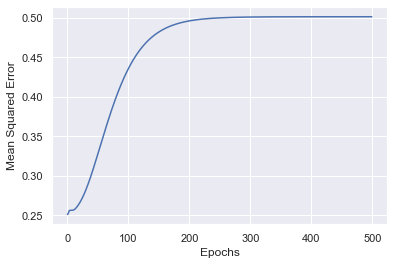

In [35]:
#Initialization Function: He, Activation Function: Tanh

nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='tanh', initialise='he')


In [36]:
Y_pred_train = nn.predict(X_train, activation_function='tanh')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='tanh')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


<ipython-input-13-bbc2e4de54a6>:22: RuntimeWarning: overflow encountered in exp
  return (2.0/(1.0 + np.exp(-2*x))) - 1


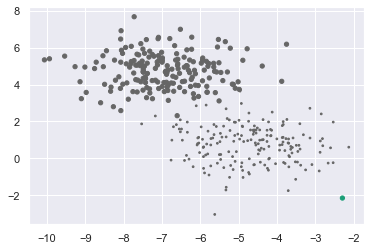

In [37]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

100%|██████████| 500/500 [00:32<00:00, 15.17epoch/s]


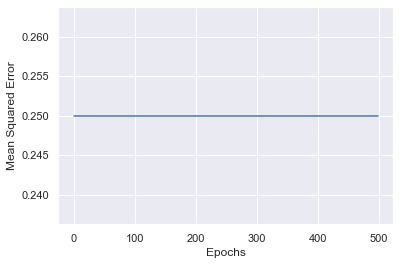

In [38]:
#Initialization Function: Zeros, Activation Function: Relu

nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='relu', initialise='zeros')


In [39]:
Y_pred_train = nn.predict(X_train, activation_function='relu')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='relu')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


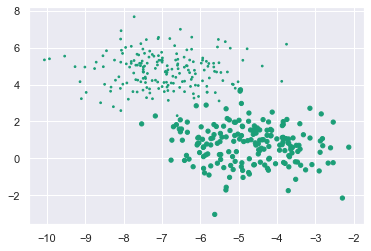

In [40]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

In [42]:
#Initialization Function: Random, Activation Function: Relu

nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='relu')

  0%|          | 0/500 [00:00<?, ?epoch/s]<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
  0%|          | 2/500 [00:00<00:24, 19.94epoch/s]<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
<ipython-input-13-bbc2e4de54a6>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))
  1%|          | 5/500 [00:00<00:23, 21.13epoch/s]<ipython-input-13-bbc2e4de54a6>:68: RuntimeWarning: overflow encountered in double_scalars
  self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
<ipython-input-13-bbc2e4de54a6>:68: RuntimeWarning: invalid value encountered in double_scalars
  self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [43]:
Y_pred_train = nn.predict(X_train, activation_function='relu')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='relu')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


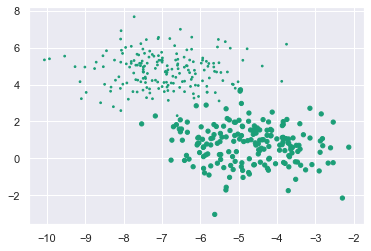

In [44]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

100%|██████████| 500/500 [00:35<00:00, 13.92epoch/s]


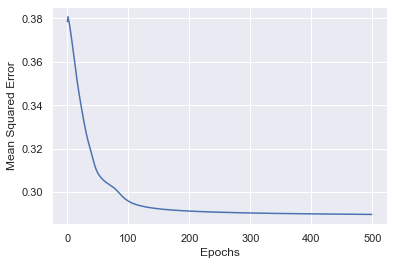

In [45]:
#Initialization Function: Xavier, Activation Function: Relu

nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='relu', initialise='xavier')


In [46]:
Y_pred_train = nn.predict(X_train, activation_function='relu')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='relu')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.61
Validation accuracy 0.65


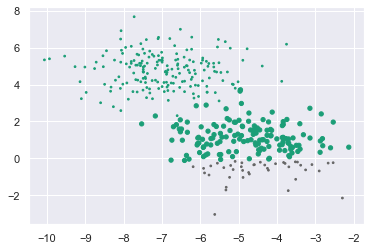

In [47]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

100%|██████████| 500/500 [00:35<00:00, 14.21epoch/s]


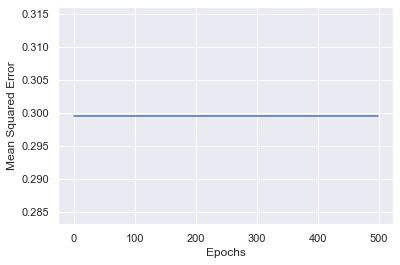

In [48]:
#Initialization Function: He, Activation Function: Relu

nn = neuralNetwork()
nn.fit(X_train, Y_train, epochs=500, learning_rate=.01, display_loss=True, activation_function='relu', initialise='he')


In [49]:
Y_pred_train = nn.predict(X_train, activation_function='relu')
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = nn.predict(X_test, activation_function='relu')
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.5
Validation accuracy 0.5


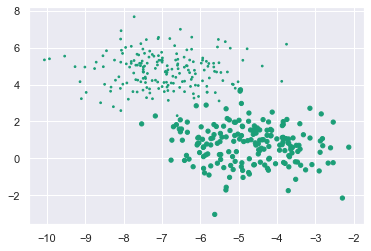

In [50]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2',
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()